# Method 1

## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

## Load dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Numerical/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Separate features and the Class column
data_features = data.drop(columns=['Class', 'Time'])
data_class = data['Class']

In [ ]:
data_features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


## Feature Analysis

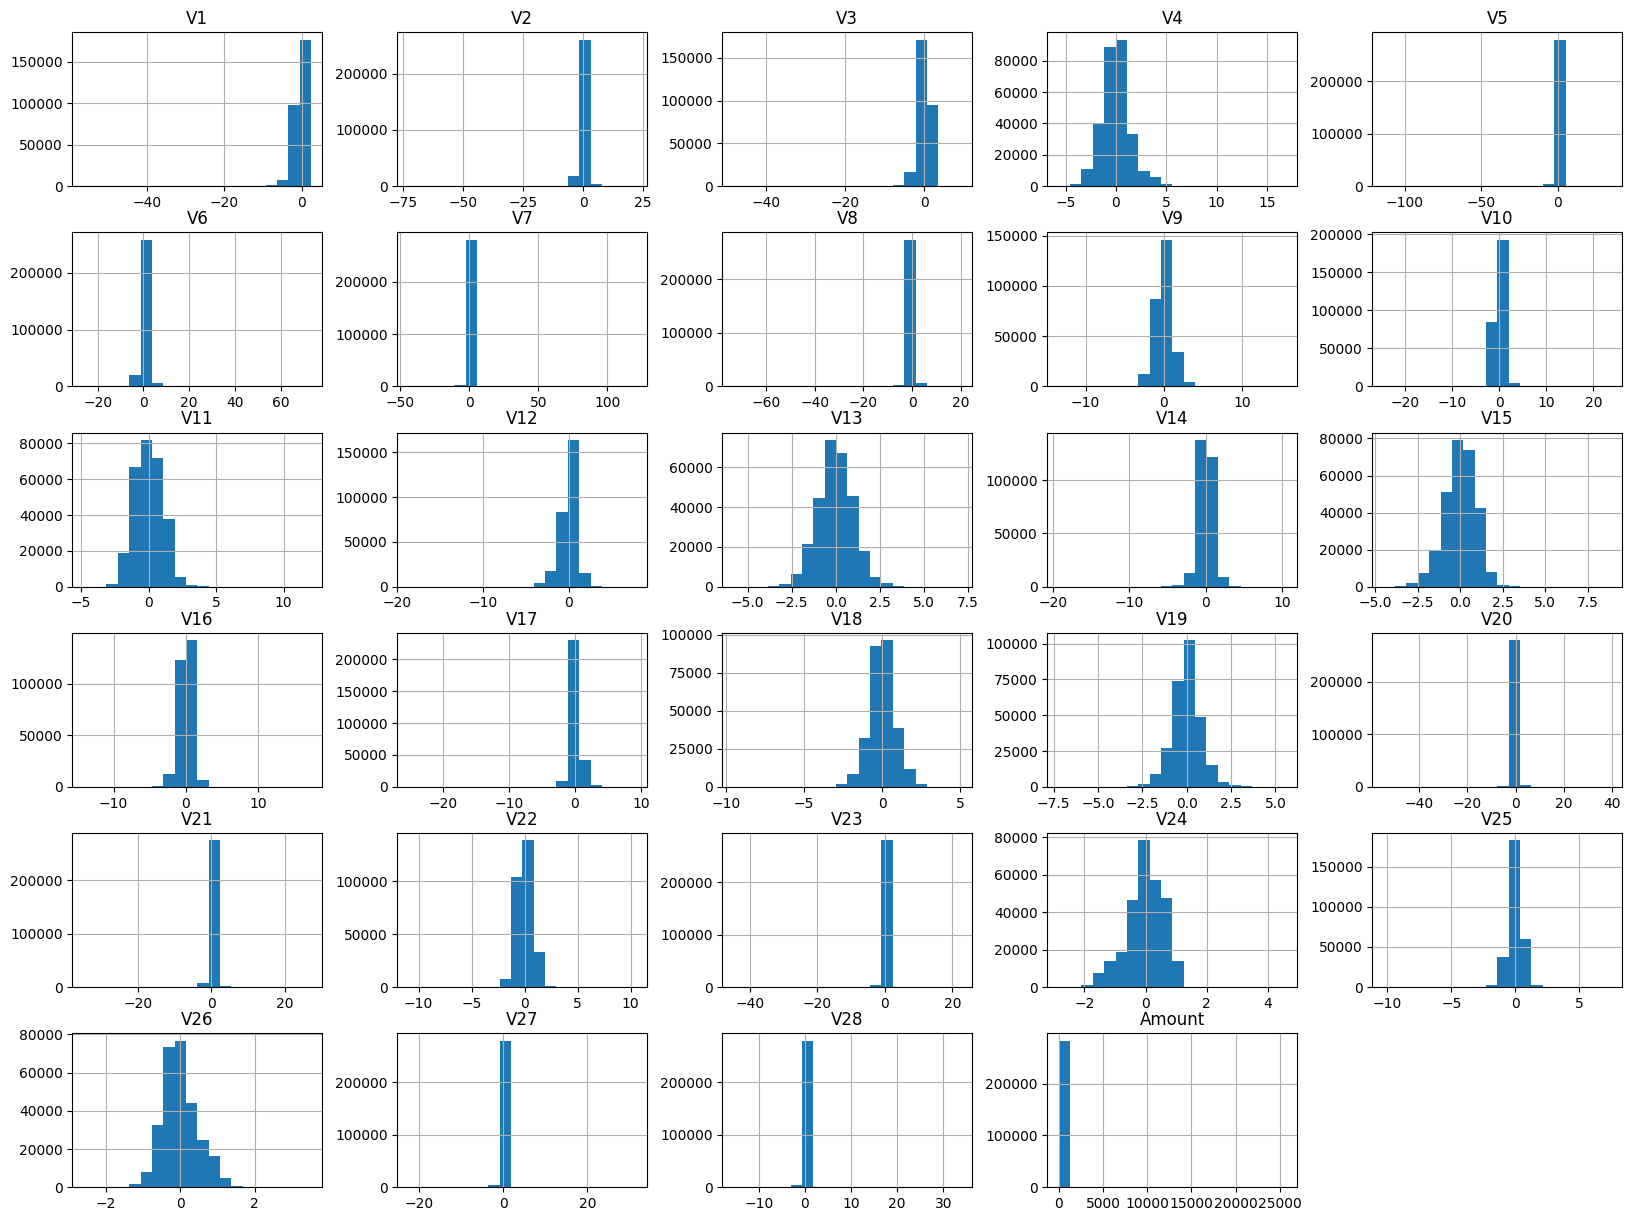

In [ ]:
# Plot histograms for each feature
data_features.hist(bins=20, figsize=(20, 15))
plt.show()

## Anomaly Detection

In [ ]:
# Number of bins
num_bins = 30

# Function to compute histogram and detect anomalies
def detect_anomalies_with_histogram(feature_data, bin_threshold=0.0005):
    # Compute the histogram
    hist, bin_edges = np.histogram(feature_data, bins=num_bins)

    # Determine the total number of data points
    total_points = len(feature_data)

    # Identify bins with low counts as anomalies (e.g., bins with less than bin_threshold percentage of total points)
    anomaly_bins = np.where(hist < bin_threshold * total_points)[0]

    # Collect indices of data points in the anomaly bins
    anomaly_indices = []
    for bin_idx in anomaly_bins:
        # Get indices of data points in this bin
        bin_start = bin_edges[bin_idx]
        bin_end = bin_edges[bin_idx + 1]
        bin_indices = np.where((feature_data >= bin_start) & (feature_data < bin_end))[0]
        anomaly_indices.extend(bin_indices)

    return np.unique(anomaly_indices)

In [ ]:
# Dictionary to hold anomalies for each feature
anomalies_dict = {}

# Detect anomalies for each feature
for feature in data_features.columns:
    anomalies = detect_anomalies_with_histogram(data_features[feature])
    anomalies_dict[feature] = anomalies

# Display anomalies for each feature
# anomalies_dict

## Identify and Count Anomalies

In [ ]:
# Count anomalies for each feature
anomaly_counts = {feature: len(anomalies) for feature, anomalies in anomalies_dict.items()}
anomaly_counts

{'V1': 318,
 'V2': 357,
 'V3': 411,
 'V4': 296,
 'V5': 244,
 'V6': 344,
 'V7': 353,
 'V8': 362,
 'V9': 293,
 'V10': 543,
 'V11': 419,
 'V12': 458,
 'V13': 58,
 'V14': 631,
 'V15': 133,
 'V16': 303,
 'V17': 557,
 'V18': 404,
 'V19': 174,
 'V20': 313,
 'V21': 334,
 'V22': 306,
 'V23': 338,
 'V24': 399,
 'V25': 312,
 'V26': 354,
 'V27': 252,
 'V28': 304,
 'Amount': 203}

In [ ]:
# Initialize an array to hold anomaly flags for each row
num_rows = len(data_features)
anomaly_flags = np.zeros(num_rows, dtype=int)

# Update anomaly flags based on anomalies in each feature
for anomalies in anomalies_dict.values():
    anomaly_flags[anomalies] = 1

anomaly_flags

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Count the number of anomalies found
num_anomalies_found = anomaly_flags.sum()

# Display the number of anomalies found
num_anomalies_found

4029

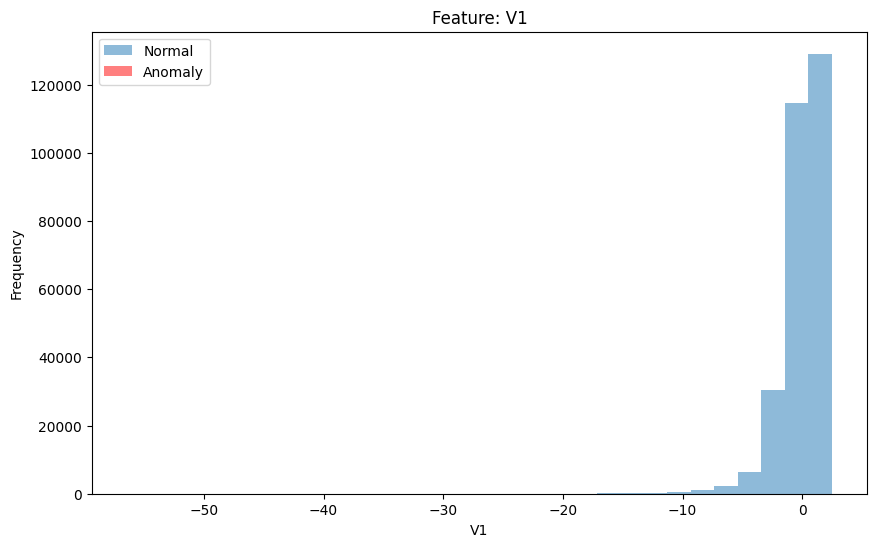

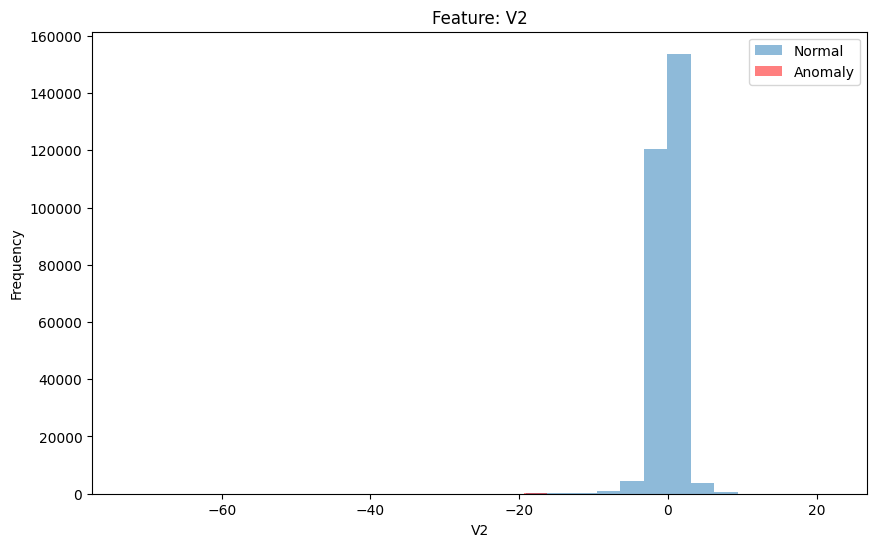

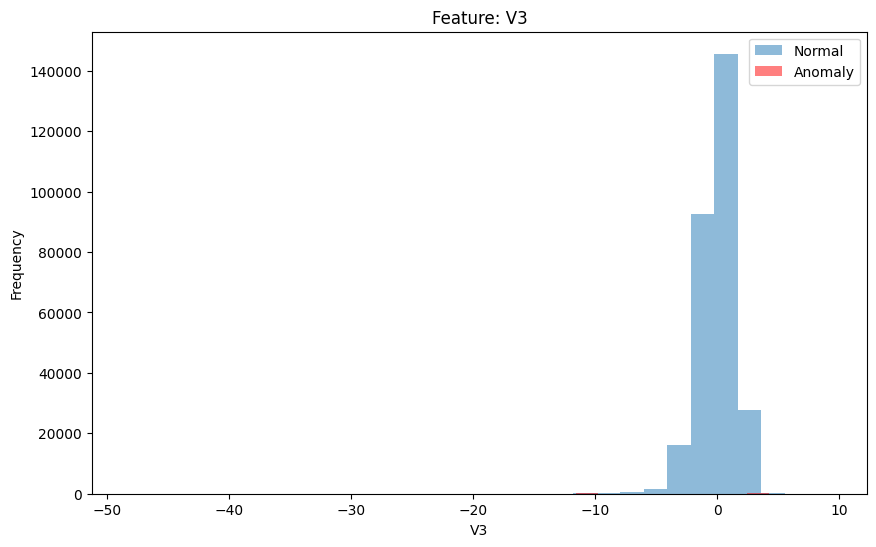

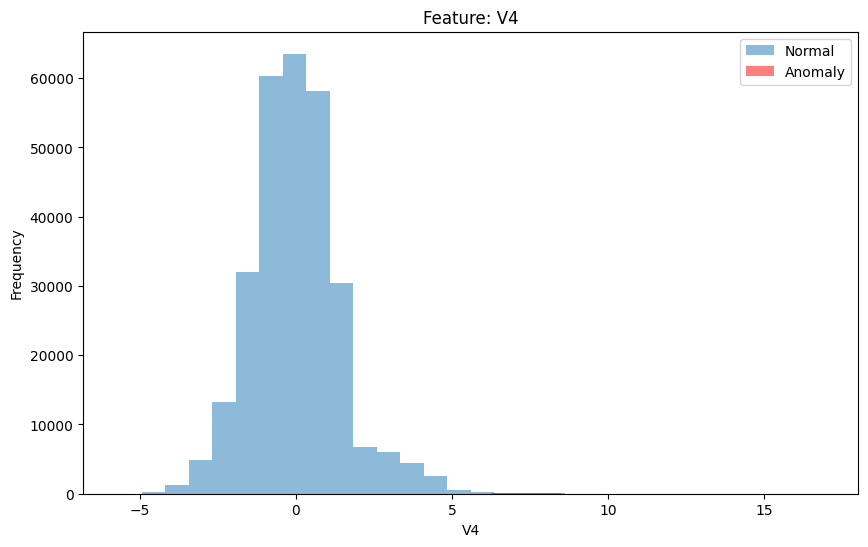

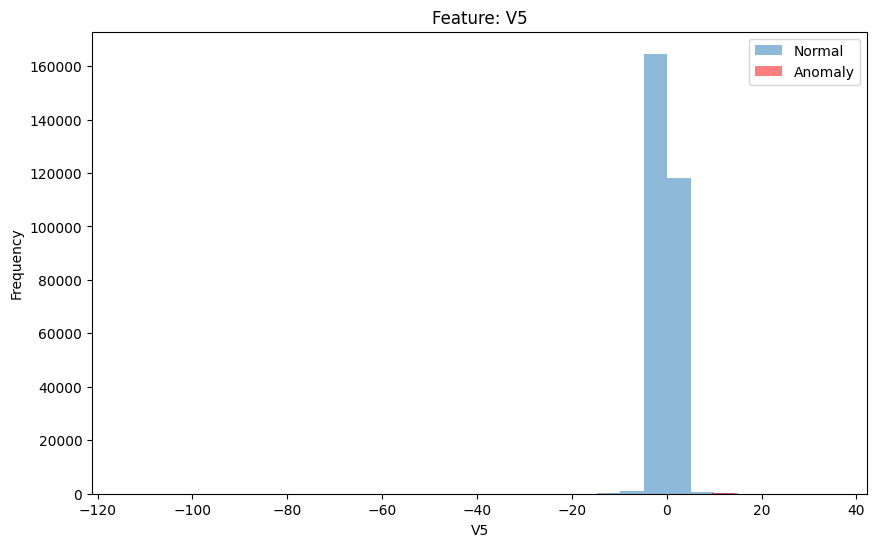

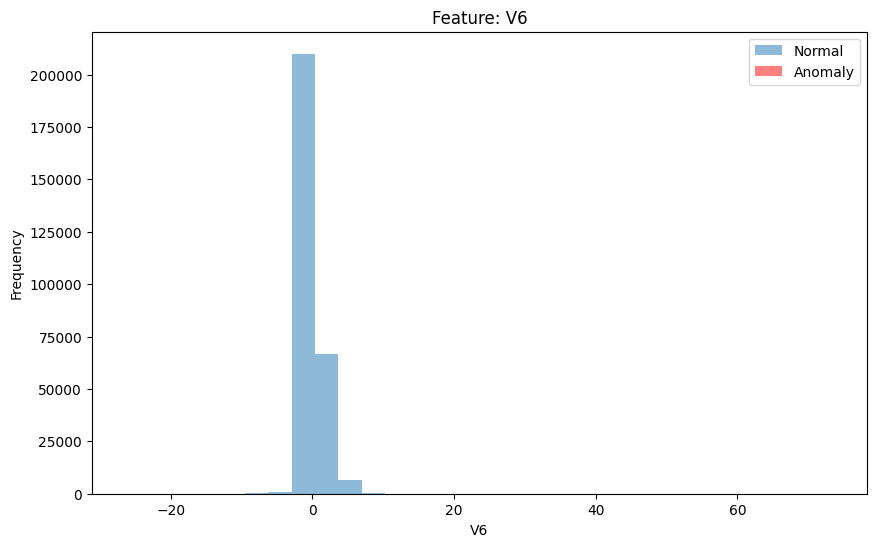

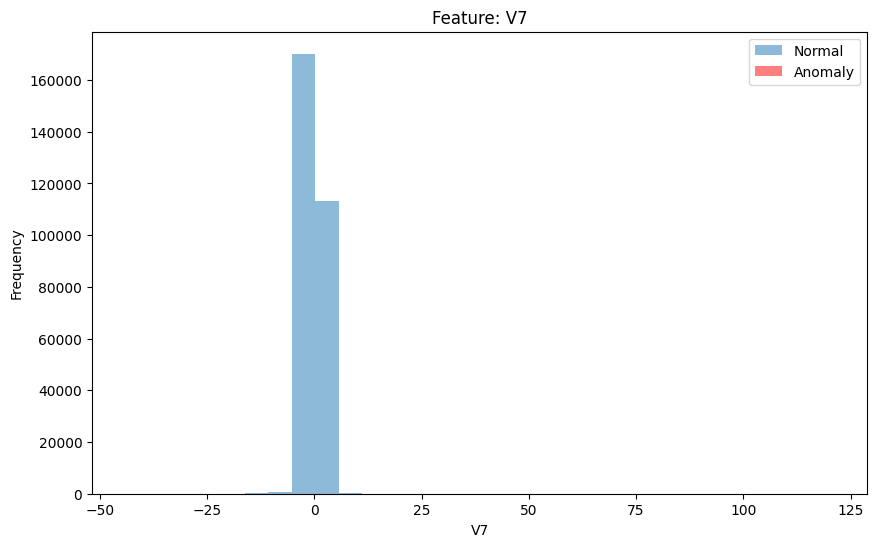

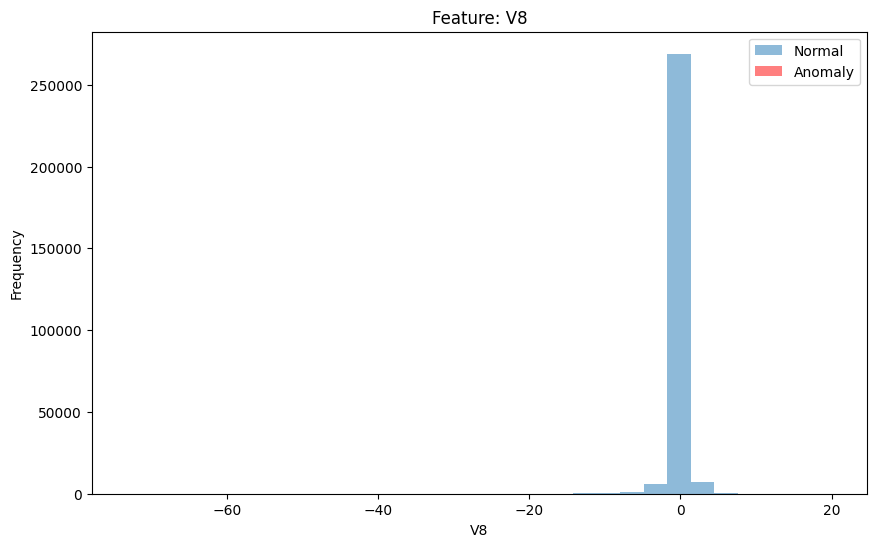

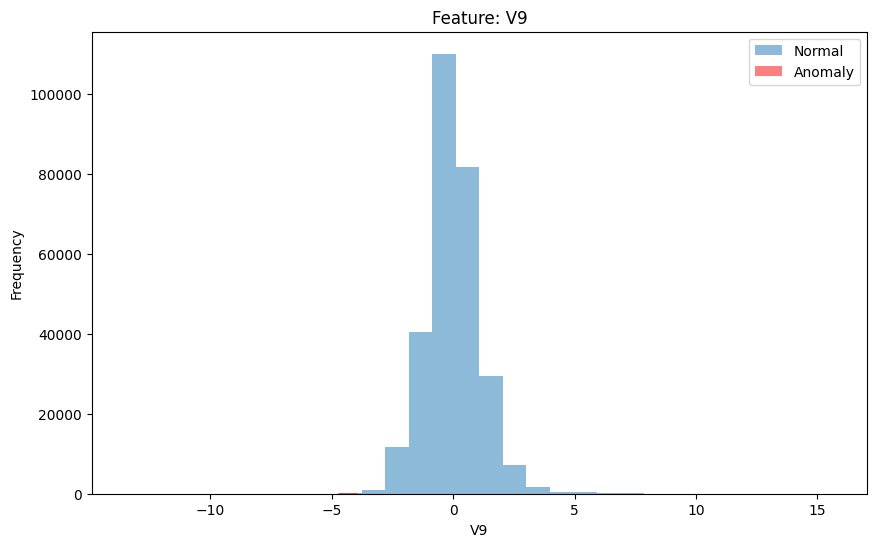

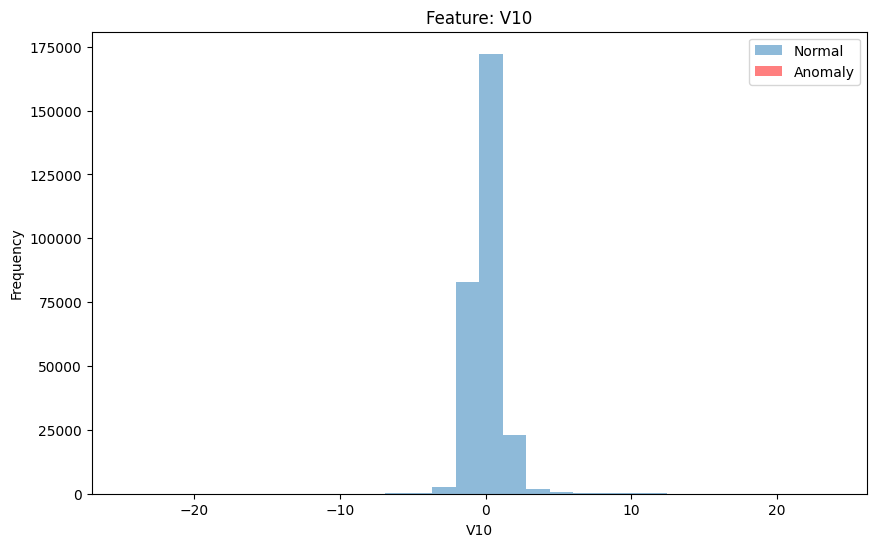

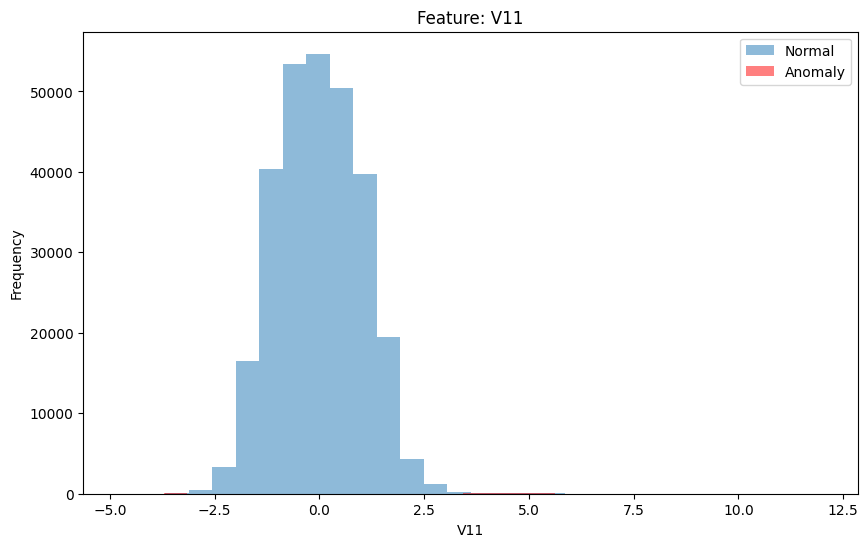

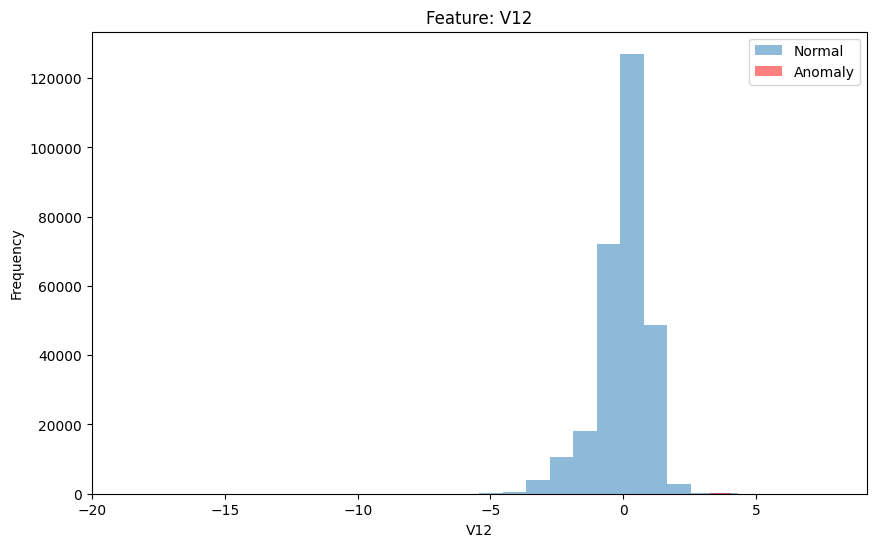

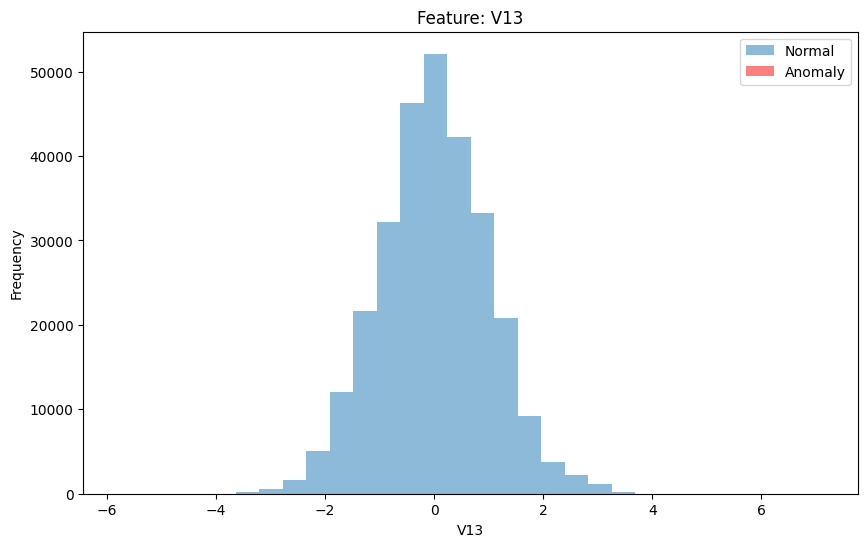

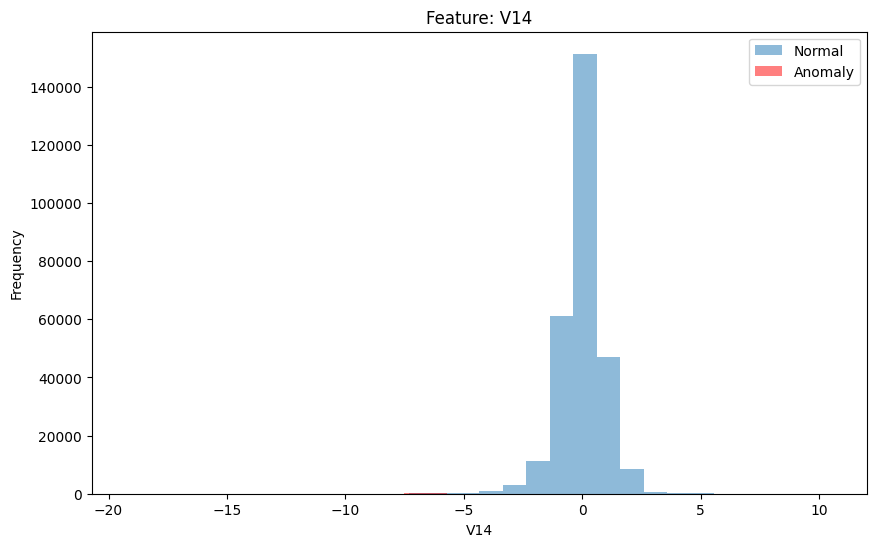

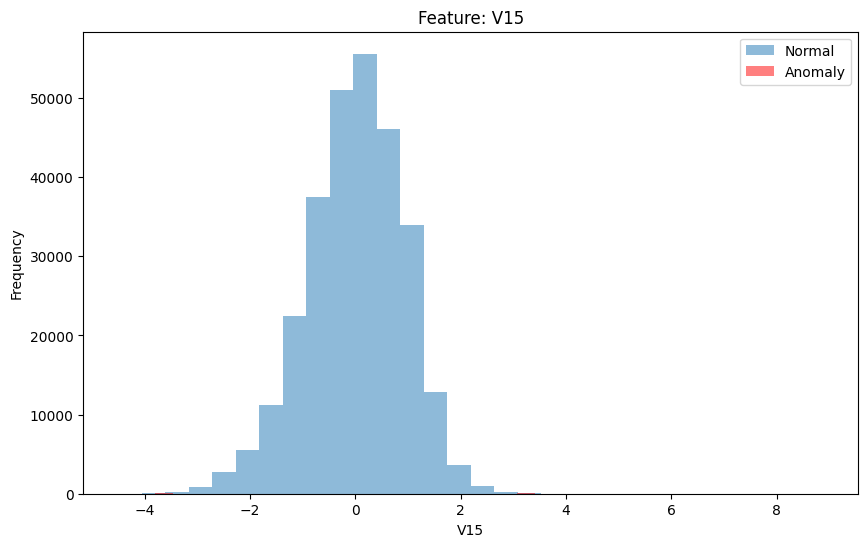

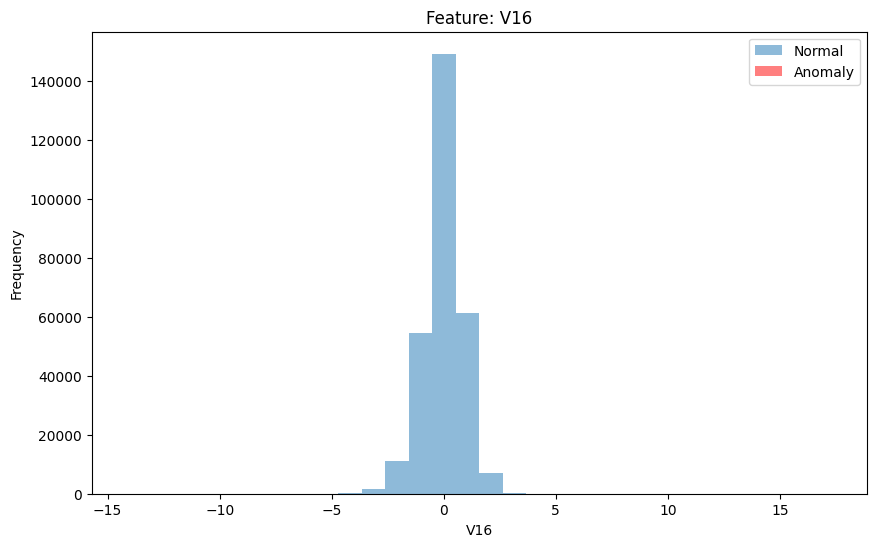

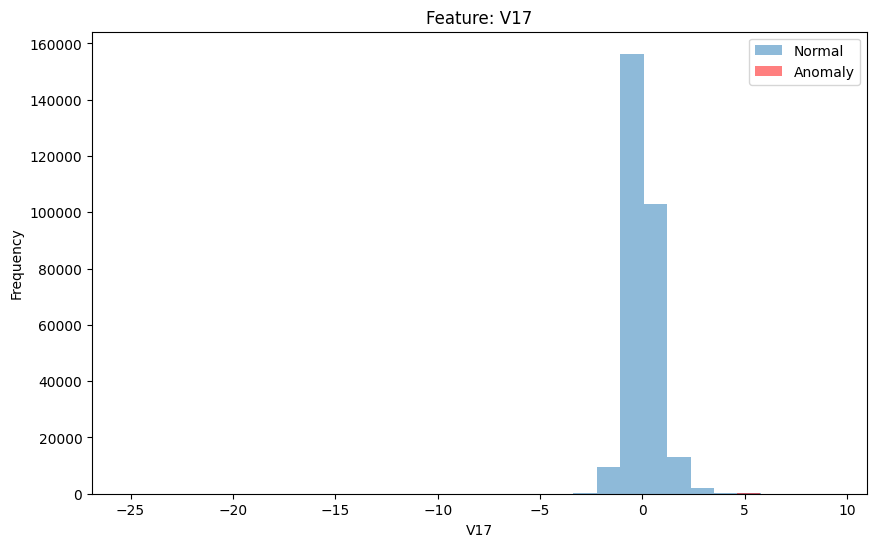

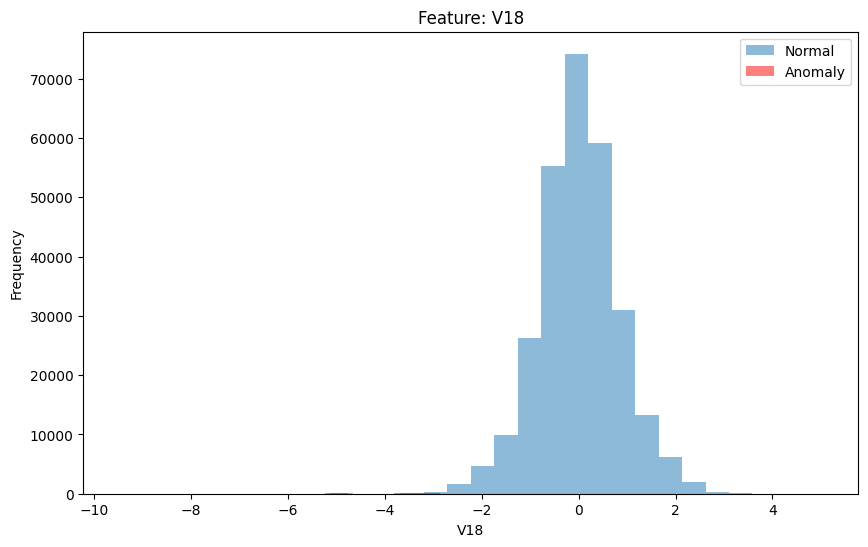

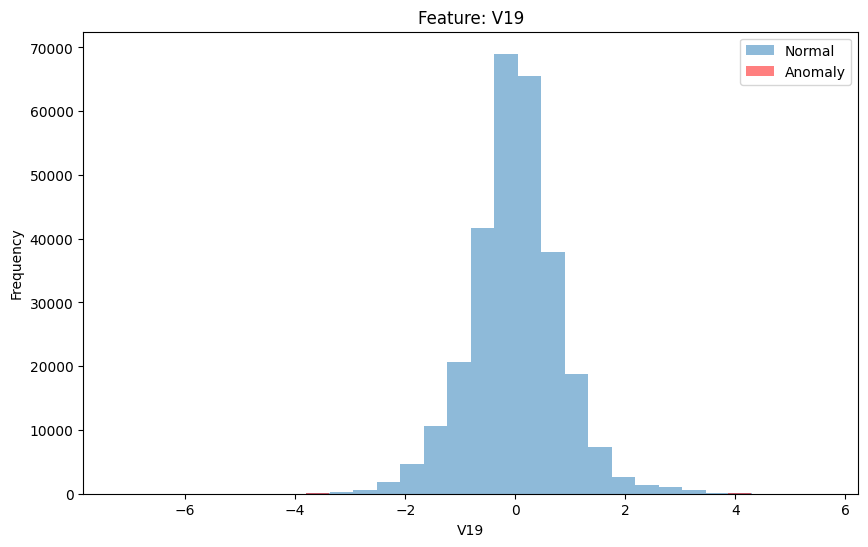

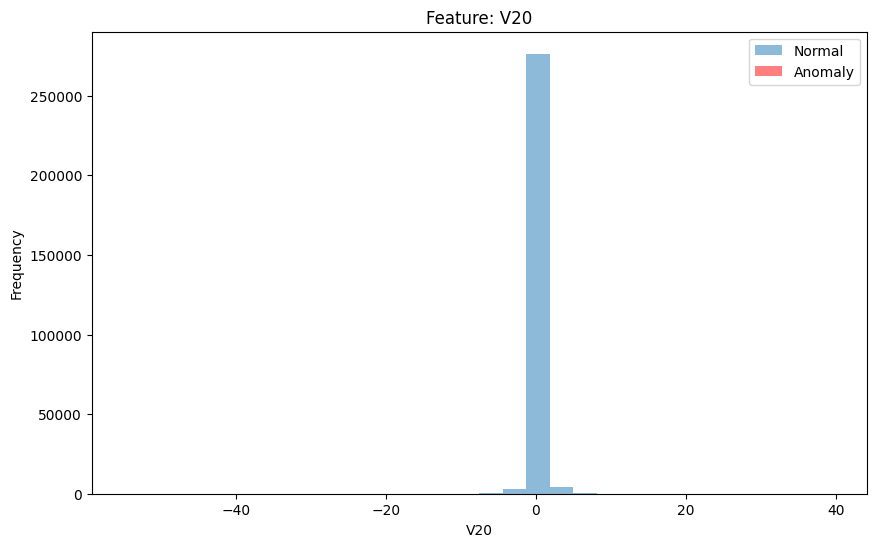

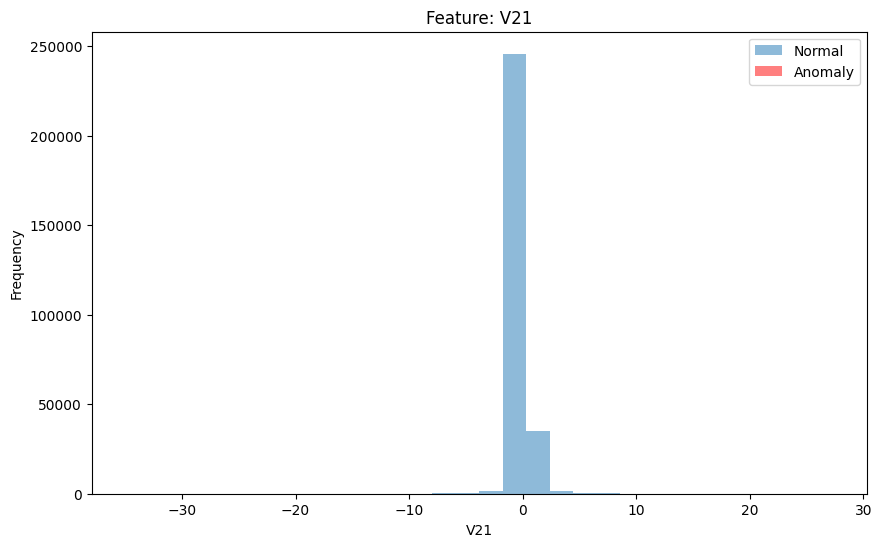

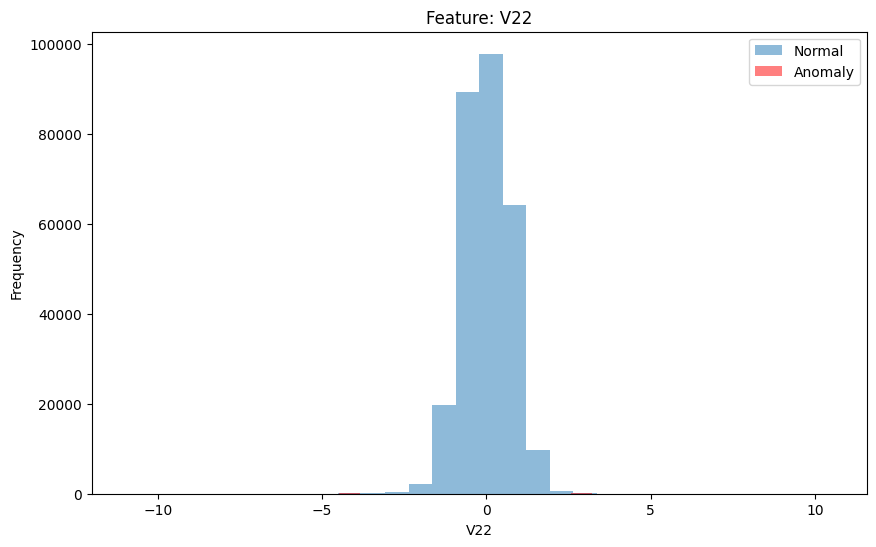

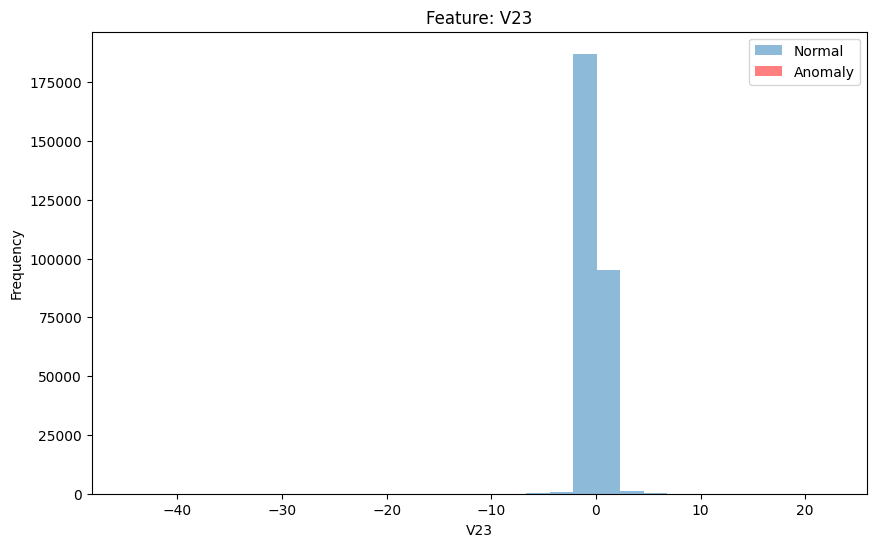

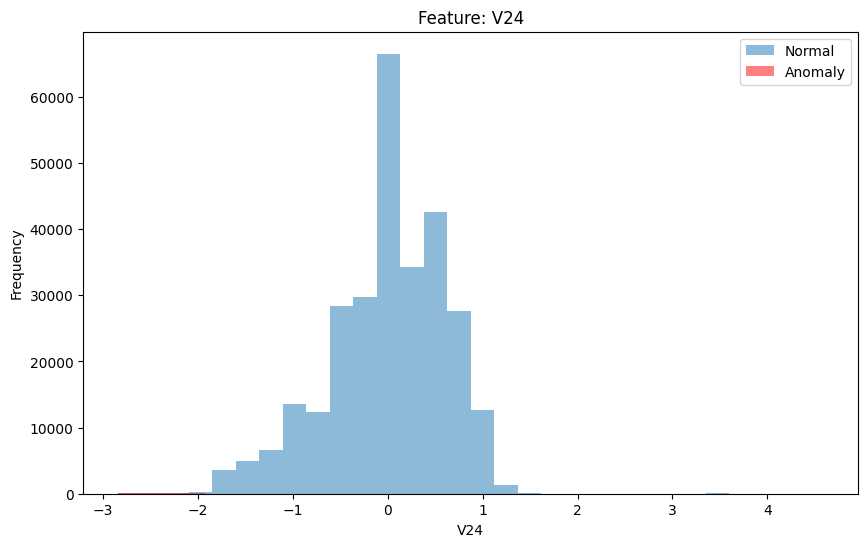

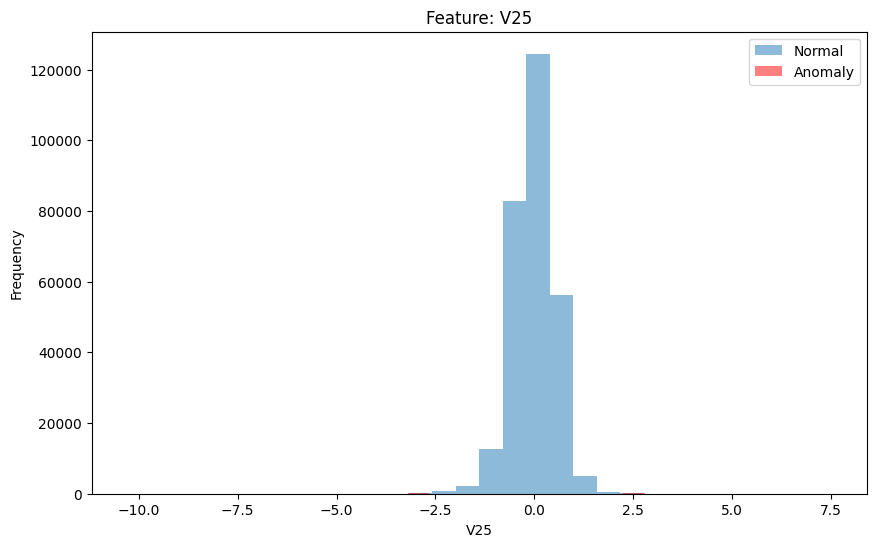

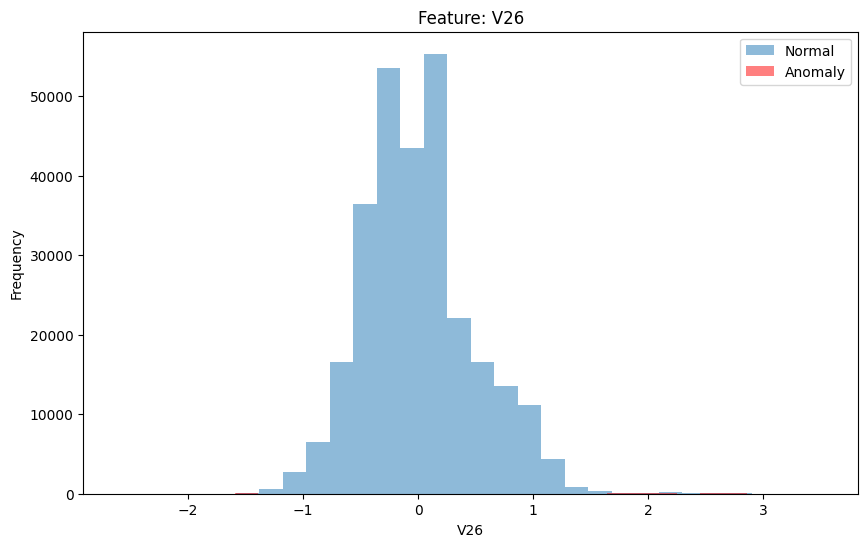

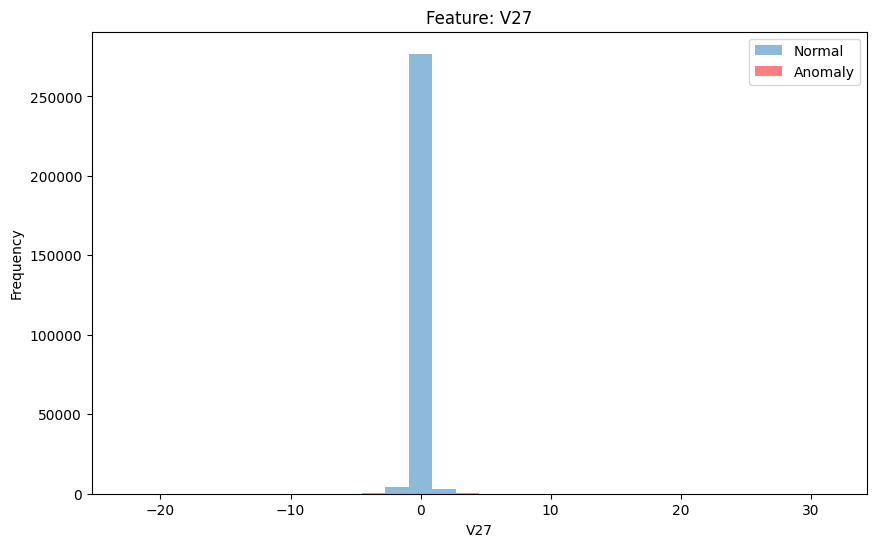

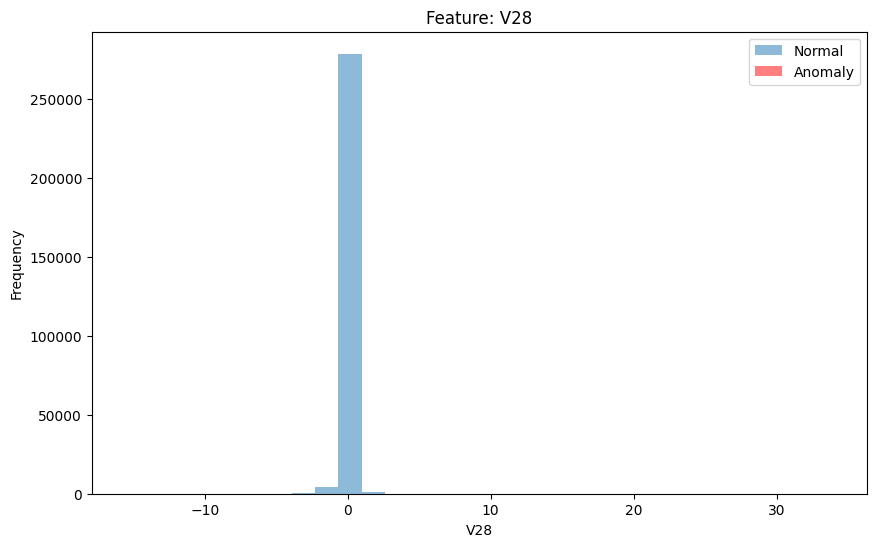

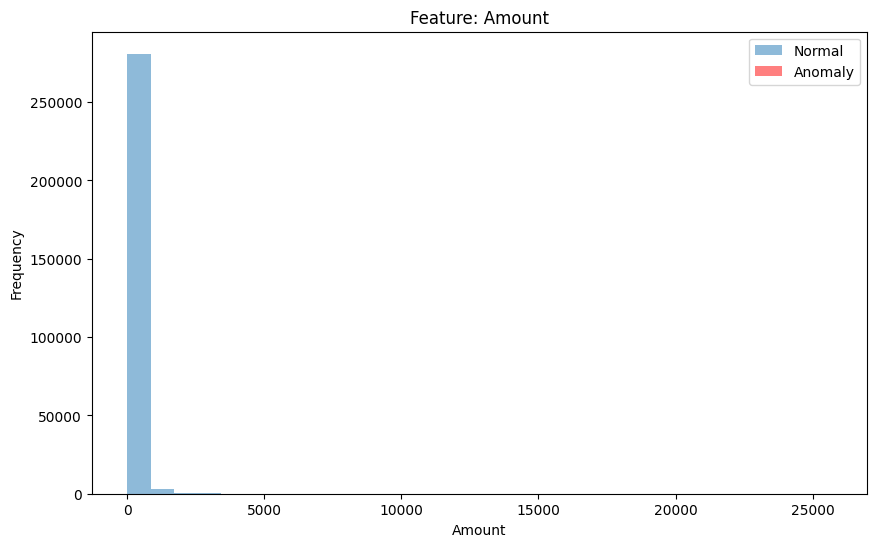

In [ ]:
import matplotlib.pyplot as plt

# Plot selected features with anomalies highlighted
features_to_plot = data_features.columns  # Plot the first four features for simplicity

for feature in features_to_plot:
    anomaly_indices = anomalies_dict[feature]
    plt.figure(figsize=(10, 6))
    plt.hist(data_features[feature], bins=num_bins, alpha=0.5, label='Normal')
    if len(anomaly_indices) > 0:
        plt.hist(data_features[feature].iloc[anomaly_indices], bins=num_bins, alpha=0.5, label='Anomaly', color='red')
    plt.title(f'Feature: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [ ]:
# There is a trade off between precision and recall
# Compare anomaly flags with the original Class column
print(confusion_matrix(data_class, anomaly_flags))
print("//////////STAT////////////")
print(classification_report(data_class, anomaly_flags))

[[280683   3632]
 [    95    397]]
//////////STAT////////////
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.10      0.81      0.18       492

    accuracy                           0.99    284807
   macro avg       0.55      0.90      0.58    284807
weighted avg       1.00      0.99      0.99    284807



# Method 2

## Import

In [ ]:
! pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193267 sha256=d5d7c560ec5b58edb78060d16bc9f3108dbdb32de13ae529719d5c89ef7f1afc
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pyod.models.hbos import HBOS
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## Load dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Numerical/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Separate features and labels
X = data.drop(columns=['Class', 'Time'])
y = data['Class']

## Scaling the values

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Check Distribution

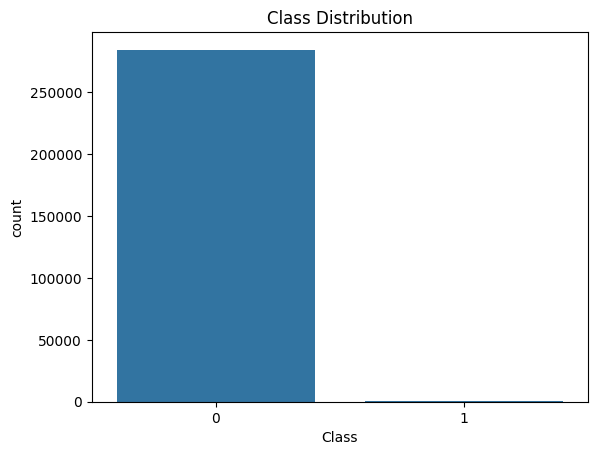

In [ ]:
# Check the distribution of the classes
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

In [ ]:
len(y)

284807

In [ ]:
# Calculate the total number of instances
total_instances =len(y)

# Calculate the number of anomalous instances
anomalous_instances = len(y[y==1])

# Calculate the contamination fraction
contamination_fraction = anomalous_instances / total_instances
contamination_fraction

0.001727485630620034

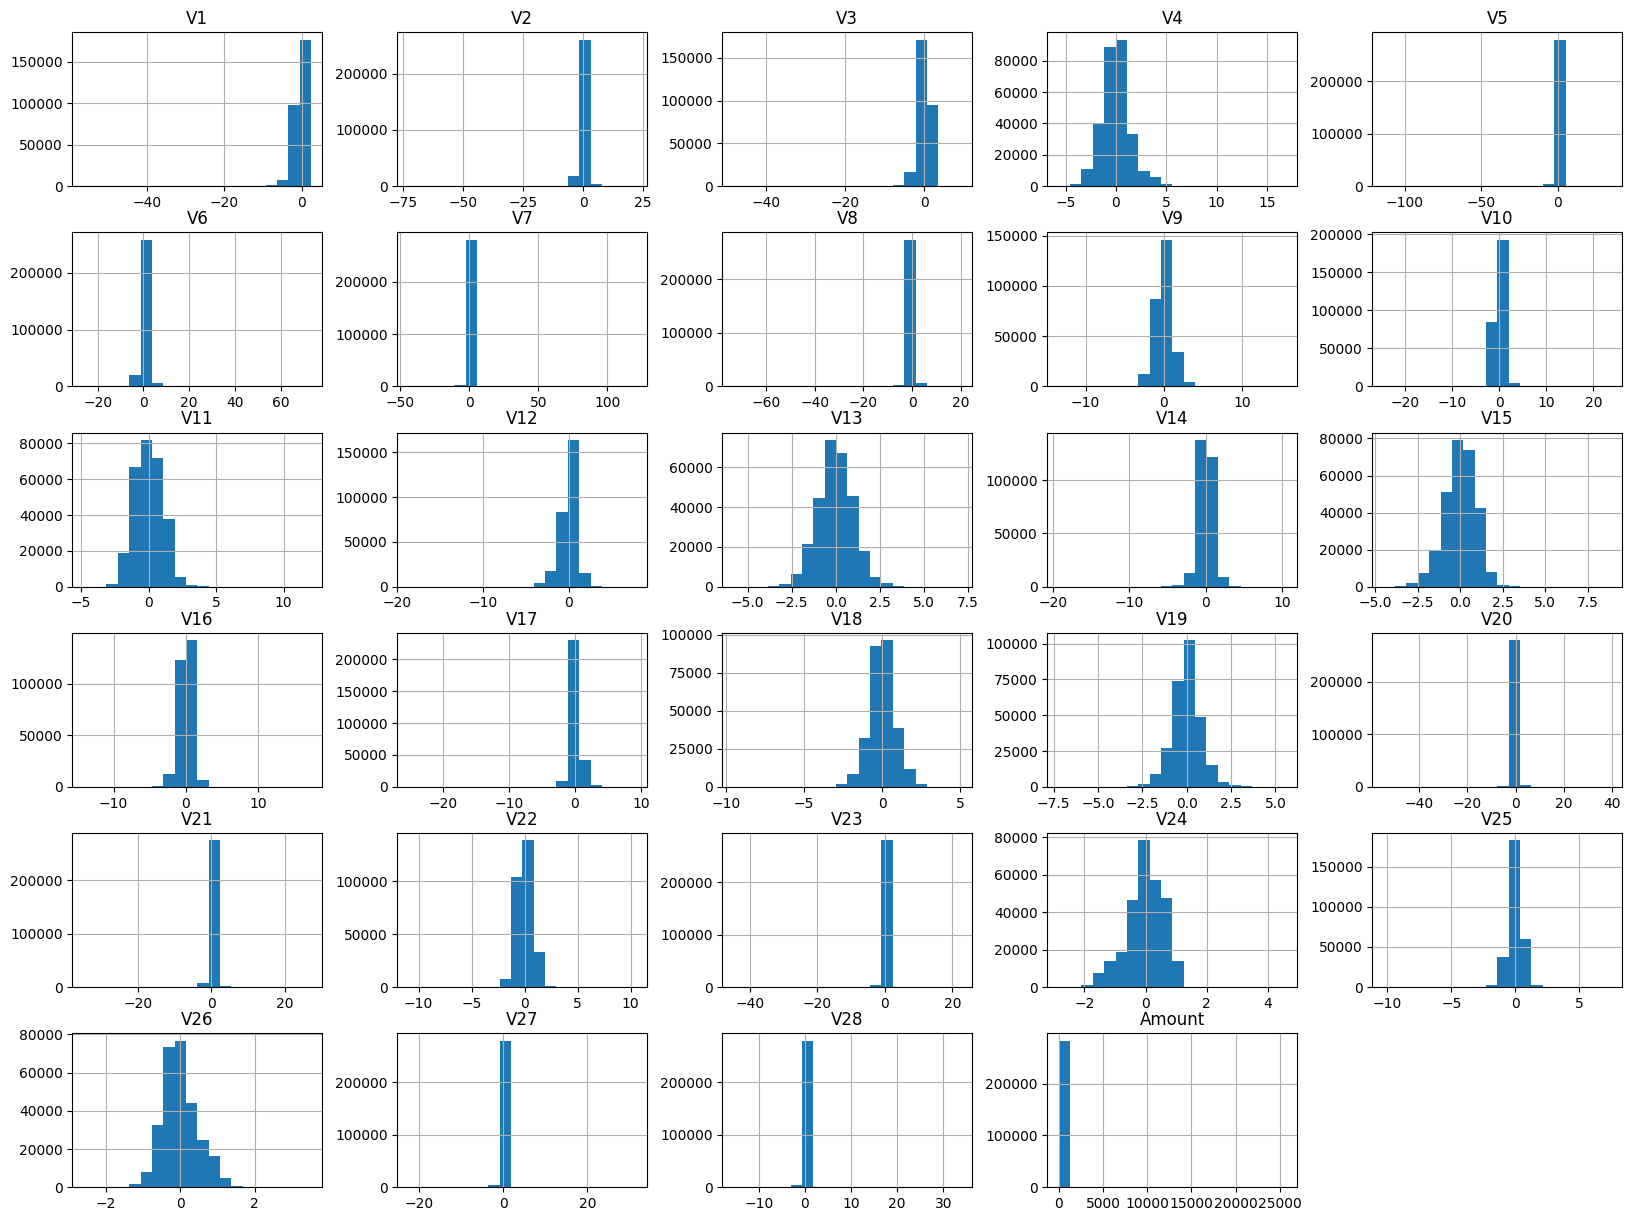

In [ ]:
# Plot histograms for each feature
X.hist(bins=20, figsize=(20, 15))
plt.show()

##  Implement HBOS for Anomaly Detection

In [ ]:
# Initialize the HBOS model
hbos = HBOS(contamination=0.003, n_bins=20)

In [ ]:
# Fit the model
hbos.fit(X_scaled)

HBOS(alpha=0.1, contamination=0.003, n_bins=20, tol=0.5)

In [ ]:
# Get the prediction scores
y_scores = hbos.decision_function(X_scaled)
y_pred = hbos.labels_

In [ ]:
len(y_pred[y_pred == 1])

855

In [ ]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("Classification Report:")
print(classification_report(y, y_pred))

roc_score = roc_auc_score(y, y_scores)
print("ROC AUC Score:", roc_score)

Confusion Matrix:
[[283674    641]
 [   278    214]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.25      0.43      0.32       492

    accuracy                           1.00    284807
   macro avg       0.62      0.72      0.66    284807
weighted avg       1.00      1.00      1.00    284807

ROC AUC Score: 0.9551102285639039
